In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
cars_df = pd.read_csv('auto_mpg.csv')

In [28]:
cars_df.shape

(398, 9)

There are 398 observations and 9 attributes

In [29]:
cars_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

There are 5 float attributes, 3 integer attributes and 1 string attribute

In [30]:
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,1970,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,1970,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,1970,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,1970,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,1970,1,ford torino


Find if any column has missing values

In [31]:
cars_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

Column 'horsepower' has 6 missing value. Replace missing values for horsepower column with mean

In [32]:
cars_df['horsepower'].fillna(value=cars_df['horsepower'].mean(skipna=True), inplace=True)

Verify if missing values are replaced?

In [33]:
cars_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

# Univariate analysis for mpg column:

In [34]:
cars_df['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

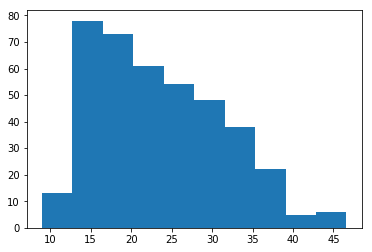

In [35]:
plt.hist(cars_df['mpg'])
plt.show()

In [36]:
print("Skewness: %f" % cars_df['mpg'].skew())
print("Kurtosis: %f" % cars_df['mpg'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


## Univariate analysis for cylinders column

In [37]:
cars_df['cylinders'].describe()

count    398.000000
mean       5.454774
std        1.701004
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

In [38]:
cars_df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

There are only 5 unique values for this column, so should treat it as descrete column and convert to one hot encoding.

In [39]:
cars_df=pd.concat([cars_df,pd.get_dummies(cars_df['cylinders'], prefix='cylinders')],axis=1)

# Univariate analysis for displacement column

In [40]:
cars_df['displacement'].describe()

count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

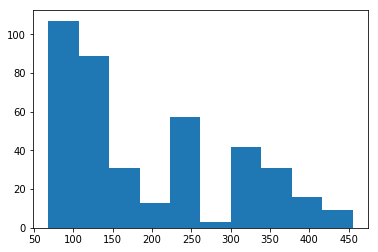

In [41]:
plt.hist(cars_df['displacement'])
plt.show()

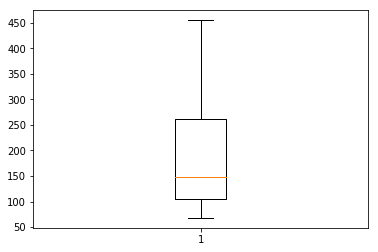

In [42]:
plt.boxplot(cars_df['displacement'])
plt.show()

Check if any values fall below 0.05 percentile

In [43]:
cars_df[cars_df['displacement']<cars_df['displacement'].quantile(0.05)]['displacement']

51     79.0
53     71.0
54     72.0
71     70.0
111    70.0
117    68.0
129    79.0
131    71.0
142    79.0
144    76.0
145    83.0
151    79.0
218    79.0
243    80.0
246    78.0
334    70.0
343    79.0
345    81.0
Name: displacement, dtype: float64

Replace these outliers with value of 0.05 percentile value

In [44]:
cars_df.loc[cars_df['displacement']<cars_df['displacement'].quantile(0.05),['displacement']]=cars_df['displacement'].quantile(0.05)

Similarly check if any outliers exists above 0.95 percentile value

In [45]:
cars_df[cars_df['displacement']>cars_df['displacement'].quantile(0.95)]['displacement']

5     429.0
6     454.0
7     440.0
8     455.0
13    455.0
67    429.0
90    429.0
94    440.0
95    455.0
Name: displacement, dtype: float64

Replace these outliers with value of 0.95 percentile value

In [46]:
cars_df.loc[cars_df['displacement']>cars_df['displacement'].quantile(0.95),['displacement']]=cars_df['displacement'].quantile(0.95)

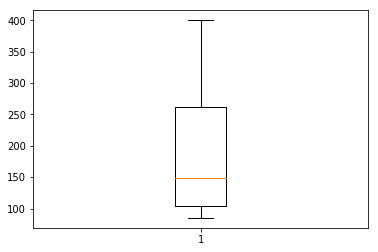

In [47]:
plt.boxplot(cars_df['displacement'])
plt.show()

# Univariate analysis for horsepower column

In [48]:
cars_df['horsepower'].describe()

count    398.000000
mean     104.469388
std       38.199187
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

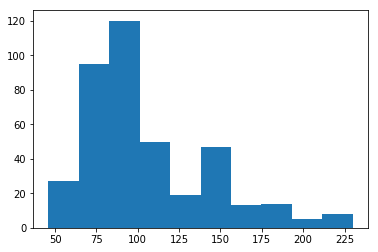

In [49]:
plt.hist(cars_df['horsepower'])
plt.show()

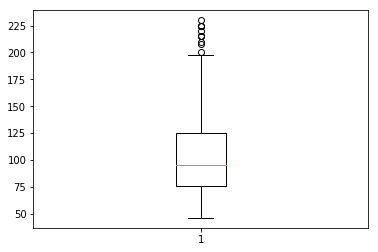

In [50]:
plt.boxplot(cars_df['horsepower'])
plt.show()

Check if any values fall below 0.05 percentile

In [51]:
cars_df[cars_df['horsepower']<cars_df['horsepower'].quantile(0.05)]['horsepower']

19     46.0
55     60.0
59     54.0
102    46.0
117    49.0
144    52.0
181    53.0
195    52.0
196    60.0
198    53.0
218    58.0
244    48.0
246    52.0
248    60.0
310    60.0
325    48.0
326    48.0
343    58.0
345    60.0
394    52.0
Name: horsepower, dtype: float64

Replace these outliers with value of 0.05 percentile value

In [52]:
cars_df.loc[cars_df['horsepower']<cars_df['horsepower'].quantile(0.05),['horsepower']]=cars_df['horsepower'].quantile(0.05)

Similarly check if any outliers exists above 0.95 percentile value

In [53]:
cars_df[cars_df['horsepower']>cars_df['horsepower'].quantile(0.95)]['horsepower']

5      198.0
6      220.0
7      215.0
8      225.0
9      190.0
13     225.0
25     215.0
26     200.0
27     210.0
28     193.0
67     208.0
70     190.0
90     198.0
94     215.0
95     225.0
116    230.0
231    190.0
Name: horsepower, dtype: float64

Replace these outliers with value of 0.95 percentile value

In [54]:
cars_df.loc[cars_df['horsepower']>cars_df['horsepower'].quantile(0.95),['horsepower']]=cars_df['horsepower'].quantile(0.95)

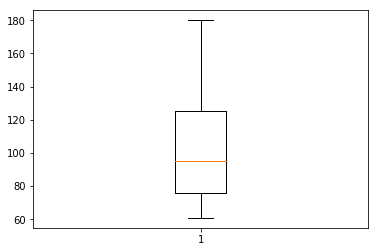

In [55]:
plt.boxplot(cars_df['horsepower'])
plt.show()

# Univariate analysis for acceleration column

In [56]:
cars_df['acceleration'].describe()

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

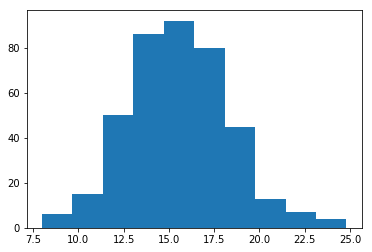

In [57]:
plt.hist(cars_df['acceleration'])
plt.show()

Replace the outliers with values of 0.05 percentile value or 0.95 percentile value

In [58]:
cars_df.loc[cars_df['acceleration']<cars_df['acceleration'].quantile(0.05),['acceleration']]=cars_df['acceleration'].quantile(0.05)
cars_df.loc[cars_df['acceleration']>cars_df['acceleration'].quantile(0.95),['acceleration']]=cars_df['acceleration'].quantile(0.95)

# Univariate analysis for weight column

In [59]:
cars_df['weight'].describe()

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

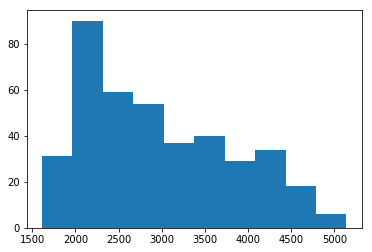

In [60]:
plt.hist(cars_df['weight'])
plt.show()

Replace outliers with value of 0.05 or 0.95 percentile values

In [61]:
cars_df.loc[cars_df['weight']<cars_df['weight'].quantile(0.05),['weight']]=cars_df['weight'].quantile(0.05)
cars_df.loc[cars_df['weight']>cars_df['weight'].quantile(0.95),['weight']]=cars_df['weight'].quantile(0.95)

# Univariate analysis for origin column

In [62]:
cars_df['origin'].describe()

count    398.000000
mean       1.572864
std        0.802055
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: origin, dtype: float64

In [63]:
cars_df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

There are only 3 unique values for this column, so this is descrete column

Convert this column to one-hot code values

In [64]:
cars_df=pd.concat([cars_df,pd.get_dummies(cars_df['origin'], prefix='origin')],axis=1)

In [65]:
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.000,1970,1,chevrolet chevelle malibu,0,0,0,0,1,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.500,1970,1,buick skylark 320,0,0,0,0,1,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.285,1970,1,plymouth satellite,0,0,0,0,1,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.000,1970,1,amc rebel sst,0,0,0,0,1,1,0,0
4,17.0,8,302.0,140.0,3449.0,11.285,1970,1,ford torino,0,0,0,0,1,1,0,0


Univariate analysis for column year

In [66]:
cars_df['year'].describe()

count     398.000000
mean     1976.010050
std         3.697627
min      1970.000000
25%      1973.000000
50%      1976.000000
75%      1979.000000
max      1982.000000
Name: year, dtype: float64

In [67]:
cars_df['year'].value_counts()

1973    40
1978    36
1976    34
1982    31
1975    30
1981    29
1980    29
1979    29
1970    29
1977    28
1972    28
1971    28
1974    27
Name: year, dtype: int64

As the year is not numeric, we should covert to categorical

In [68]:
cars_df=pd.concat([cars_df,pd.get_dummies(cars_df['year'], prefix='year')],axis=1)

Univariate analysis for 'name' column

In [69]:
cars_df['name'].value_counts()

ford pinto                         6
ford maverick                      5
toyota corolla                     5
amc matador                        5
chevrolet chevette                 4
chevrolet impala                   4
amc gremlin                        4
amc hornet                         4
peugeot 504                        4
toyota corona                      4
ford galaxie 500                   3
chevrolet caprice classic          3
honda civic                        3
volkswagen dasher                  3
pontiac catalina                   3
ford gran torino                   3
plymouth fury iii                  3
chevrolet citation                 3
plymouth duster                    3
dodge colt                         3
chevrolet nova                     3
chevrolet vega                     3
ford country squire (sw)           2
volkswagen rabbit                  2
datsun 710                         2
ford gran torino (sw)              2
opel manta                         2
d

Out of 398 observations, this column has 305 unique values. This is not helpful for model. So, drop this column.

In [70]:
cars_df.drop(['name'],axis=1,inplace=True)

In [71]:
feature_cols = ['displacement', 'horsepower', 'weight',
       'acceleration', 'cylinders_3', 'cylinders_4',
       'cylinders_5', 'cylinders_6', 'cylinders_8', 'origin_1', 'origin_2',
       'origin_3', 'year_1970', 'year_1971', 'year_1972', 'year_1973',
       'year_1974', 'year_1975', 'year_1976', 'year_1977', 'year_1978',
       'year_1979', 'year_1980', 'year_1981', 'year_1982']
target_col = 'mpg'

# Split the data into train and test sets

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cars_df[feature_cols], cars_df[target_col], test_size=0.1, random_state=100)

# Linear regression

In [80]:
import statsmodels.api as sm
Xc = sm.add_constant(X_train)
linear_regression = sm.OLS(y_train,Xc)
fitted_model = linear_regression.fit()

In [81]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     111.5
Date:                Tue, 14 Aug 2018   Prob (F-statistic):          1.28e-139
Time:                        15:28:27   Log-Likelihood:                -869.53
No. Observations:                 358   AIC:                             1785.
Df Residuals:                     335   BIC:                             1874.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           27.4532      1.397     19.646      0.000      24.704      30.202
displacement     0.0059      0.008      0.758      0.449      -0.009       0.021
horsepower      -0.0522      0.015     -3.413      0.001      -0.082      -0.022
weight          -0.0055      0.001     -7.458      0.000      -0.007      -0.004
acceleration    -0.0602      0.102     -0.589      0.556      -0.261       0.141
cylinders_3     -0.4011      1.351     -0.297      0.767      -3.058       2.256
cylinders_4      6.8545      0.564     12.143      0.000       5.744       7.965
cylinders_5      7.0788      1.500      4.720      0.000       4.129      10.029
cylinders_6      5.4369      0.652      8.340      0.000       4.155       6.719
cylinders_8      8.4841      1.117      7.594      0.000       6.286      10.682
origin_1         7.7632      0.583     13.316      0.000       6.616       8.910
origin_2         9.5712      0.551     17.378      0.000       8.488      10.655
origin_3        10.1188      0.533     18.967      0.000       9.069      11.168
year_1970       -0.9437      0.620     -1.521      0.129      -2.164       0.277
year_1971       -0.1140      0.561     -0.203      0.839      -1.217       0.989
year_1972       -1.0904      0.570     -1.913      0.057      -2.212       0.031
year_1973       -1.4160      0.506     -2.796      0.005      -2.412      -0.420
year_1974        0.4581      0.570      0.804      0.422      -0.663       1.579
year_1975        0.1023      0.565      0.181      0.856      -1.009       1.214
year_1976        0.7573      0.521      1.454      0.147      -0.267       1.782
year_1977        2.3247      0.568      4.092      0.000       1.207       3.442
year_1978        2.2228      0.491      4.522      0.000       1.256       3.190
year_1979        4.1032      0.563      7.282      0.000       2.995       5.212
year_1980        8.0829      0.561     14.402      0.000       6.979       9.187
year_1981        5.8444      0.554     10.549      0.000       4.755       6.934
year_1982        7.1215      0.554     12.846      0.000       6.031       8.212
==============================================================================
Omnibus:                       27.674   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.292
Skew:                           0.440   Prob(JB):                     1.62e-12
Kurtosis:                       4.693   Cond. No.                     2.28e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.52e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [82]:
pred_train_mpg=fitted_model.predict(Xc)

In [83]:
X_testc = sm.add_constant(X_test)
pred_test_mpg=fitted_model.predict(X_testc)

# Calculate R2 score

In [84]:
from sklearn.metrics import r2_score

In [85]:
print('R square for train:', r2_score(y_train,pred_train_mpg))
print('R square for test:', r2_score(y_test,pred_test_mpg))

R square for train: 0.879874334028
R square for test: 0.836001769806
